In [3]:
import pandas as pd

deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

# Preview datasets
print(deliveries.head())
print(matches.head())

   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0

In [7]:
team_name_mapping = {
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru',
    'Gujarat Lions': 'Gujarat Titans',
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Pune Warriors': 'Rising Pune Supergiant',
    'Rising Pune Super Giant': 'Rising Pune Supergiant',
    'Rising Pune Supergiants': 'Rising Pune Supergiant'
}

# Only replace values in team columns
deliveries['batting_team'] = deliveries['batting_team'].replace(team_name_mapping)
deliveries['bowling_team'] = deliveries['bowling_team'].replace(team_name_mapping)
matches['team1'] = matches['team1'].replace(team_name_mapping)
matches['team2'] = matches['team2'].replace(team_name_mapping)
matches['winner'] = matches['winner'].replace(team_name_mapping)


In [9]:
deliveries.fillna('Unknown', inplace=True)
matches.fillna({'winner': 'No Result', 'player_of_match': 'None', 'city': 'Unknown'}, inplace=True)

In [11]:
deliveries = deliveries.drop_duplicates()
matches = matches.drop_duplicates()

In [15]:
# Standardizing column names
matches.columns = matches.columns.str.lower().str.replace(' ', '_')

In [21]:

# Adding a "season" column in matches dataset
matches['season'] = pd.to_datetime(matches['date']).dt.year

In [25]:
print(deliveries.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [29]:
deliveries.columns = deliveries.columns.str.lower().str.replace(' ', '_')
print(deliveries.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [31]:
# Aggregating runs scored by each player
deliveries['total_runs'] = deliveries['batsman_runs'] + deliveries['extra_runs']

In [33]:
player_runs = deliveries.groupby('batter')['total_runs'].sum().reset_index()

In [35]:
player_runs = player_runs.sort_values(by='total_runs', ascending=False)

In [37]:
# Calculating strike rates
deliveries['ball_faced'] = deliveries.groupby('batter')['ball'].transform('count')

In [39]:
deliveries['strike_rate'] = (deliveries['total_runs'] / deliveries['ball_faced']) * 100

In [43]:
# Team performance summary
team_performance = matches.groupby('winner').size().reset_index(name='wins')

In [45]:
print(matches.columns)

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')


In [49]:
# Calculate total overs for each match
if 'match_id' in deliveries.columns:
    overs_per_match = deliveries.groupby(['match_id', 'inning'])['over'].nunique().reset_index()
    overs_per_match.rename(columns={'over': 'total_overs'}, inplace=True)
    
    # Merge total overs into matches dataset
    if 'id' in matches.columns:
        matches_with_overs = matches.merge(
            overs_per_match.groupby('match_id')['total_overs'].sum().reset_index(),
            how='left',
            left_on='id',  # Match `id` from matches_df
            right_on='match_id'  # Match `match_id` from deliveries_df
        )
        # Add total runs column for scoring trends
        total_runs_per_match = deliveries.groupby('match_id')['total_runs'].sum().reset_index()
        matches_with_overs = matches_with_overs.merge(total_runs_per_match, how='left', left_on='id', right_on='match_id')
    else:
        print("Error: 'id' column missing in matches dataset.")
        matches_with_overs = matches_df.copy()
        matches_with_overs['total_overs'] = np.nan
        matches_with_overs['total_runs'] = np.nan
else:
    print("Error: 'match_id' column missing in deliveries dataset.")
    matches_with_overs = matches_df.copy()
    matches_with_overs['total_overs'] = np.nan
    matches_with_overs['total_runs'] = np.nan


In [129]:
# Visualizing Match Outcomes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def plot_match_outcomes():
    match_outcomes = matches['winner'].value_counts()
    match_outcomes.plot(kind='bar', figsize=(10, 6), color = 'yellow', title='Match Outcomes by Teams')
    plt.xlabel('Teams')
    plt.ylabel('Number of Wins')
    plt.show()

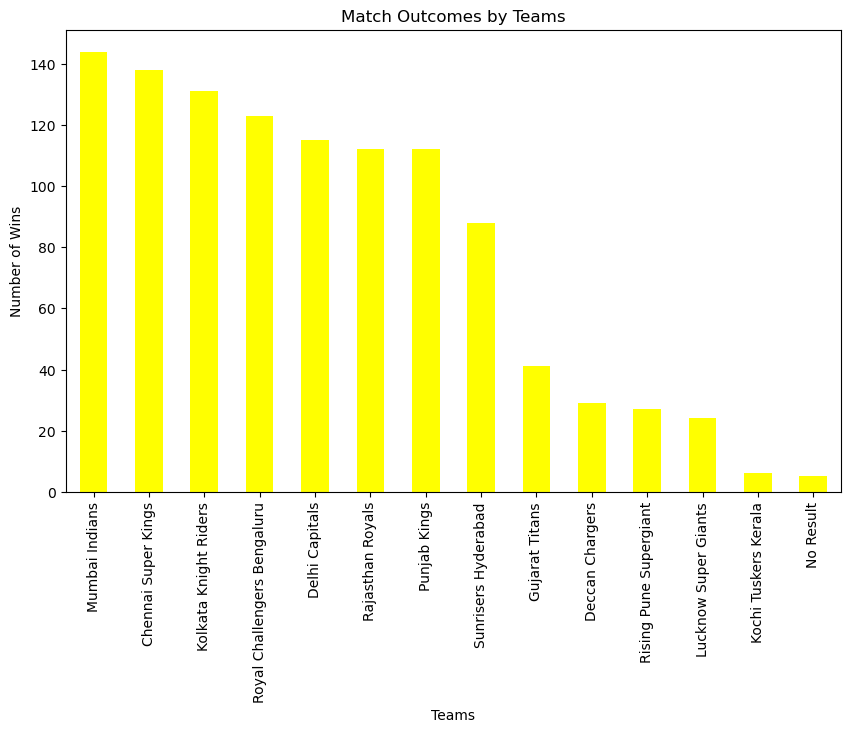

In [131]:
plot_match_outcomes()

C:\Users\Lakshmi Prasanna\AppData\Local\Temp\ipykernel_1052\11237161.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=venue_performance.values, y=venue_performance.index, orient='h', palette='Set1')


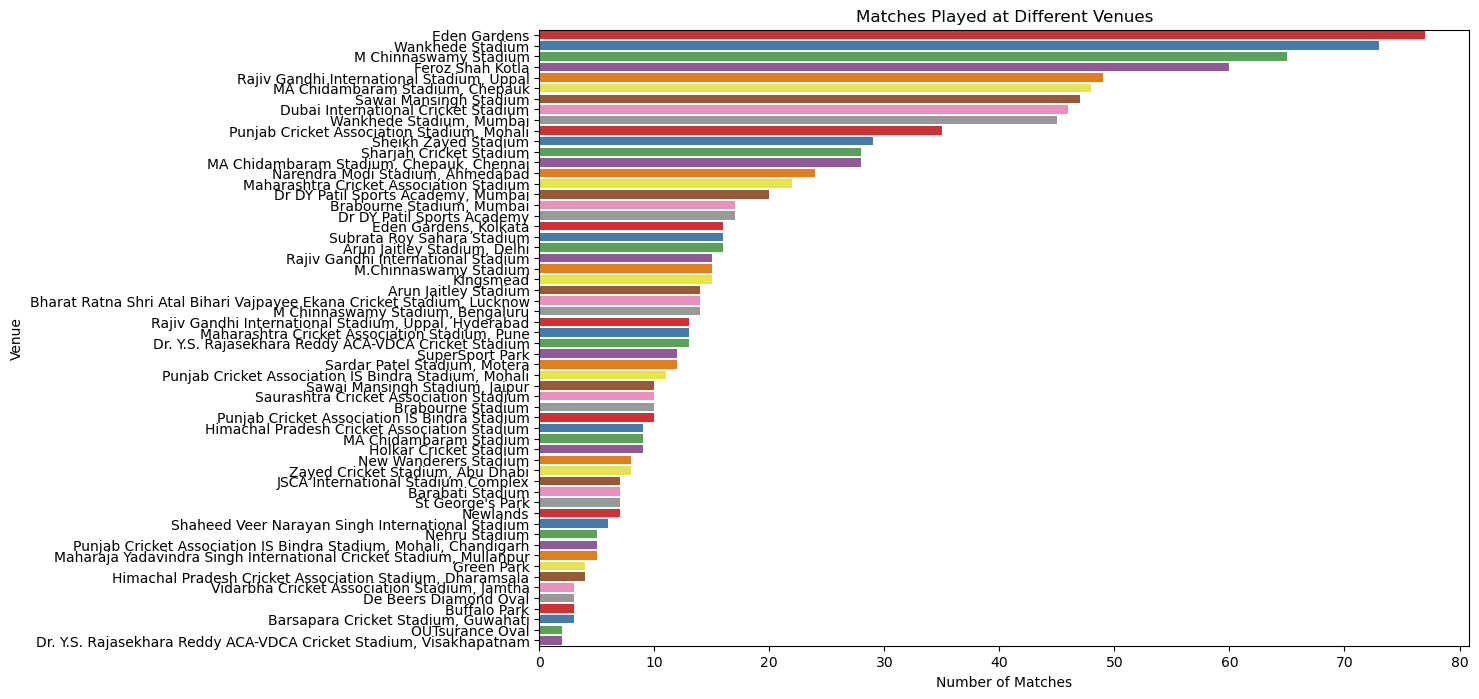

In [123]:
# Venue Performance
venue_performance = matches['venue'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=venue_performance.values, y=venue_performance.index, orient='h', palette='Set1')
plt.title('Matches Played at Different Venues')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()


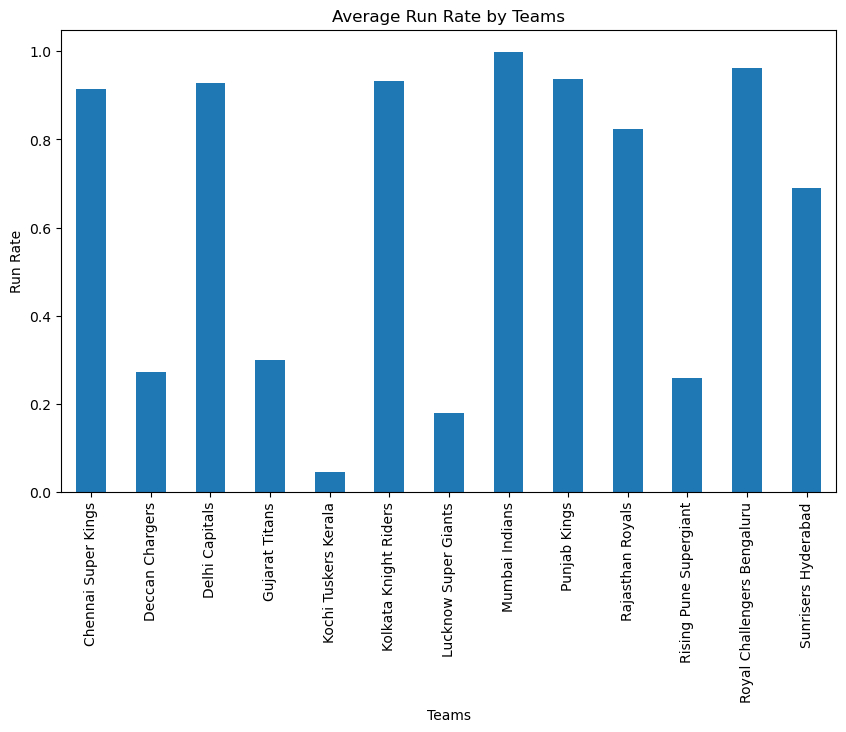

In [119]:
# Run Rate Analysis
if 'total_overs' in matches_with_overs.columns:
    total_overs = matches_with_overs['total_overs'].sum()
    if total_overs > 0:
        team_run_rates = deliveries.groupby('batting_team')['total_runs'].sum() / total_overs
        team_run_rates.plot(kind='bar', figsize=(10, 6),  title='Average Run Rate by Teams')
        plt.xlabel('Teams')
        plt.ylabel('Run Rate')
        plt.show()
    else:
        print("Error: Total overs calculated as zero.")
else:
    print("Error: 'total_overs' column missing in merged dataset.")

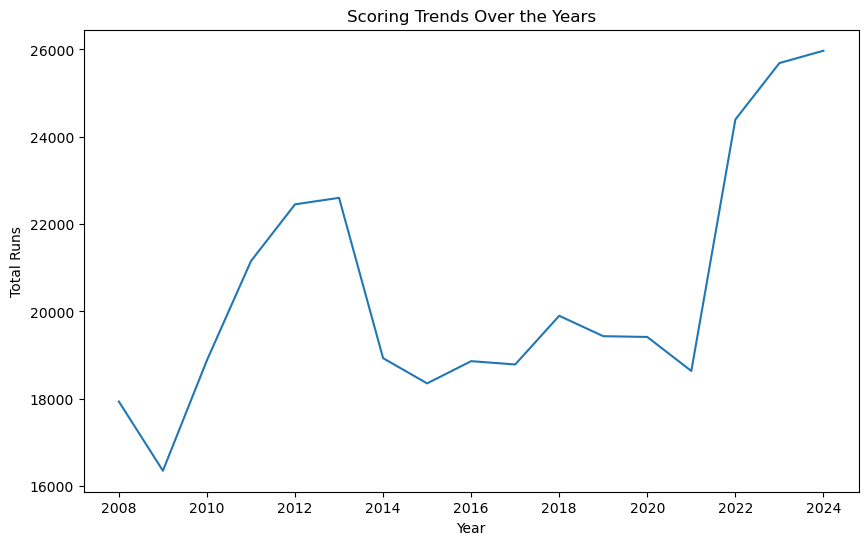

In [75]:
# Scoring Trends Over the Years
if 'total_runs' in matches_with_overs.columns:
    yearly_runs = matches_with_overs.groupby('season')['total_runs'].sum()
    yearly_runs.plot(kind='line', figsize=(10, 6), title='Scoring Trends Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Total Runs')
    plt.show()
else:
    print("Error: 'total_runs' column missing in matches_with_overs dataset.")

C:\Users\Lakshmi Prasanna\AppData\Local\Temp\ipykernel_1052\3638220199.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=partnerships['total_runs'], y=partnerships.apply(lambda x: f"{x['batter']} & {x['non_striker']}", axis=1),


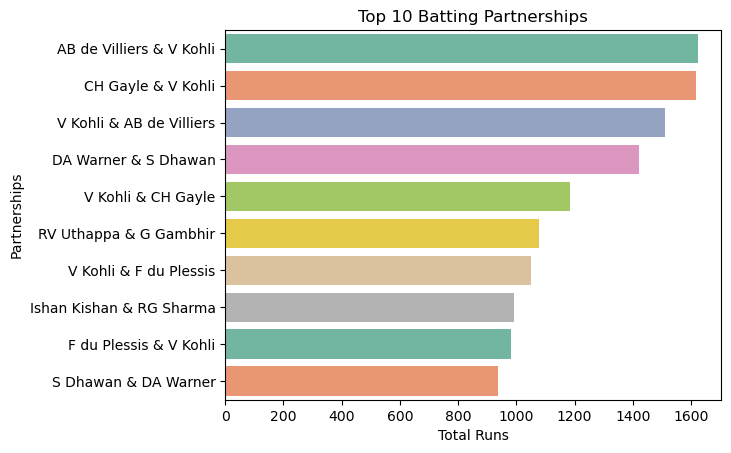

In [83]:
# Best Batting Partnerships
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping and sorting the partnerships by total runs
partnerships = deliveries.groupby(['batter', 'non_striker'])['total_runs'].sum().reset_index()
partnerships = partnerships.sort_values(by='total_runs', ascending=False).head(10)

# Use a different color palette for the bars
sns.barplot(x=partnerships['total_runs'], y=partnerships.apply(lambda x: f"{x['batter']} & {x['non_striker']}", axis=1), 
            orient='h', palette='Set2')  # 'Set2' is a palette with distinct colors

# Adding title and labels
plt.title('Top 10 Batting Partnerships')
plt.xlabel('Total Runs')
plt.ylabel('Partnerships')
plt.show()


C:\Users\Lakshmi Prasanna\AppData\Local\Temp\ipykernel_1052\2400724550.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_players['total_runs'], y=top_10_players['batter'], orient='h', palette='Set2')


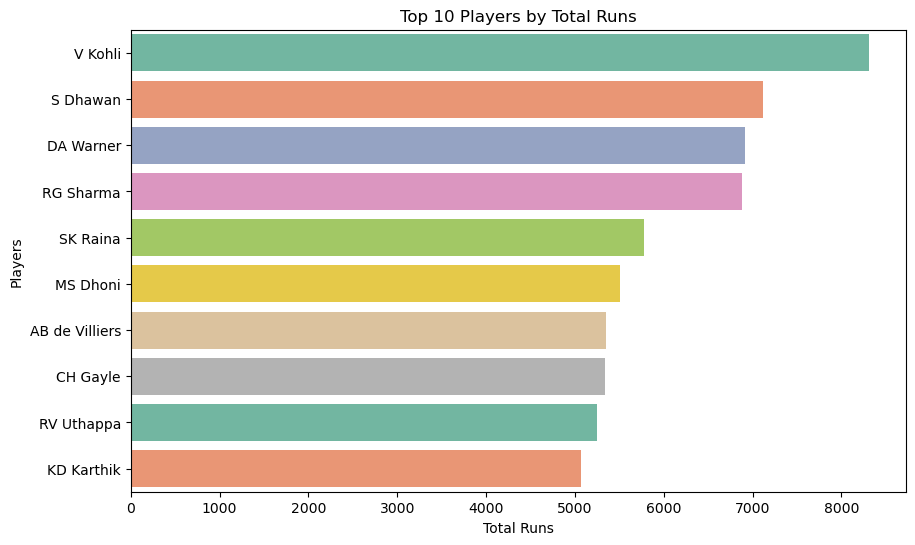

In [89]:

# Top 10 Players by Total Runs
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_10_players = player_runs.head(10)
sns.barplot(x=top_10_players['total_runs'], y=top_10_players['batter'], orient='h', palette='Set2')
plt.title('Top 10 Players by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Players')
plt.show()

In [91]:
# Merging the datasets on the 'match_id' from deliveries and 'id' from matches
merged_data = pd.merge(deliveries, matches, left_on='match_id', right_on='id', how='inner')

# Optionally, drop the redundant 'id' column from matches after merging
merged_data.drop('id', axis=1, inplace=True)

# Check the first few rows of the merged data to verify
merged_data.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [93]:
print(merged_data.shape)  # To see the number of rows and columns
print(merged_data.columns)  # To see all column names


(260920, 38)
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'ball_faced', 'strike_rate', 'season',
       'city', 'date', 'match_type', 'player_of_match', 'venue', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'target_runs', 'target_overs', 'super_over', 'method',
       'umpire1', 'umpire2'],
      dtype='object')


In [95]:
merged_data.to_csv('merged_ipl_data.csv', index=False)


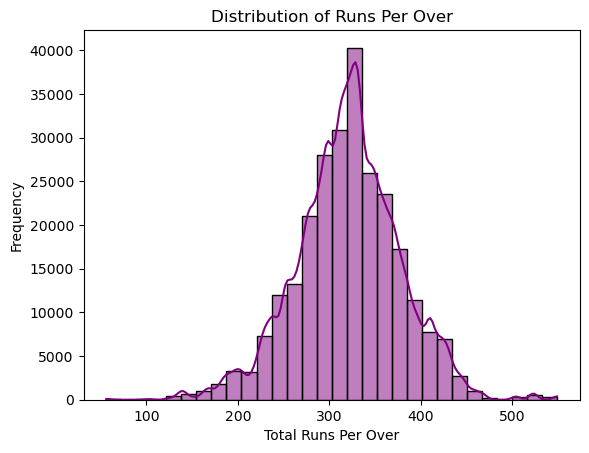

In [106]:
# Calculate runs per over for each over in a match
deliveries['over_runs'] = deliveries.groupby('match_id')['total_runs'].transform('sum')
sns.histplot(deliveries['over_runs'], bins=30, kde=True, color='purple')
plt.title('Distribution of Runs Per Over')
plt.xlabel('Total Runs Per Over')
plt.ylabel('Frequency')
plt.show()


C:\Users\Lakshmi Prasanna\AppData\Local\Temp\ipykernel_1052\2879715196.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers['wickets'], y=top_bowlers['bowler'], palette='Blues_d')


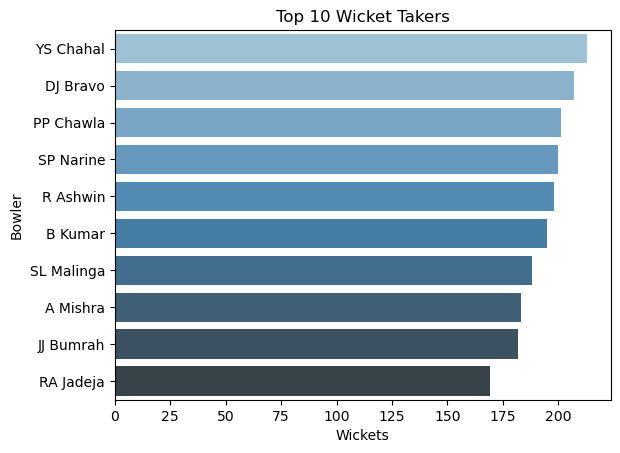

In [99]:
# Grouping by bowler and counting total wickets
top_bowlers = deliveries[deliveries['is_wicket'] == 1].groupby('bowler').size().reset_index(name='wickets')
top_bowlers = top_bowlers.sort_values(by='wickets', ascending=False).head(10)

# Plotting the top 10 wicket-takers
sns.barplot(x=top_bowlers['wickets'], y=top_bowlers['bowler'], palette='Blues_d')
plt.title('Top 10 Wicket Takers')
plt.xlabel('Wickets')
plt.ylabel('Bowler')
plt.show()

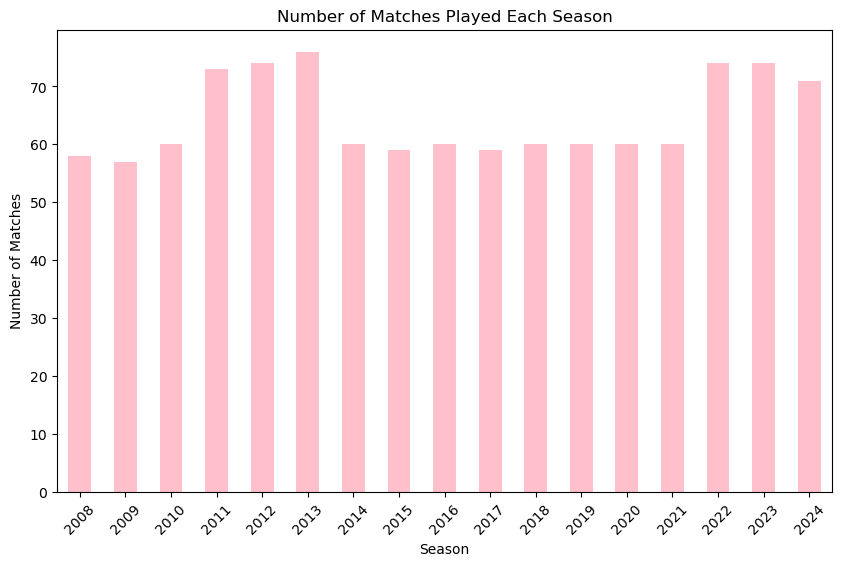

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the number of matches played each season
matches['season'] = matches['season'].astype(str)
season_counts = matches['season'].value_counts().sort_index()

plt.figure(figsize=(10,6))
season_counts.plot(kind='bar', color='pink')
plt.title('Number of Matches Played Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()
